## Linear Regression and Machine Learning
Machine learning can reduce the time it takes to program a system to complete a complicated task.  It uses an algorithm rather than full coding; to train the model and solve the problem.  In this challenge, we attempt to predict the cost of housing by creating a linear regression based on current observations.  This report includes an explanation of the following:  
**A) Linear regression and reducing error  
B) Python coding to develop this regression  
C) Tested data to prove our findings**  

### Linear Regression and Reducing Error
Linear regression allows us to use data points to determine a relationship among them.  In this challenge, we use housing data to develop a model that will estimate the cost of housing.  In this example, data points like *Lot Area, Year built, zip code, and room numbers* are considered **features** and impact the *sale price*, or **label.**  By "plotting" the data points that we have, we can start to predict a line (or train the model) that shows us the relationship between our features (predictors) and the label (target variable).  The more features we use to develop our model, the more accurate our analysis becomes.  Our first step is to import the data files that we will use to predict the cost of housing:

In [3]:
import pandas
cost = pandas.read_excel('id_cost.xlsx')
data = pandas.read_excel('id_data.xlsx')

To determine what feature(s) we wanted to use, we looked at all the data available to us from this datasource. 

In [4]:
datacost=cost.merge(data,on='Id')
datacost.sort_values('SalePrice')[0:5]

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1140,2601,135751.3189,120,RM,62.0,6710,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
1449,2910,137402.5699,180,RM,21.0,1470,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
138,1599,138607.9715,120,RM,35.0,3907,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
280,1741,139010.8478,120,FV,NaN,4217,Pave,Pave,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal
784,2245,139169.8664,180,RM,21.0,1596,Pave,NaN,Reg,Lvl,...,0,0,NaN,GdWo,NaN,0,7,2008,WD,Normal


In [5]:
datacost.loc[datacost['LotArea'].idxmax()]

Id                  2251
SalePrice         280618
MSSubClass            70
MSZoning             NaN
LotFrontage          NaN
LotArea            56600
Street              Pave
Alley                NaN
LotShape             IR1
LandContour          Low
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood      IDOTRR
Condition1          Norm
Condition2          Norm
BldgType            1Fam
HouseStyle        2.5Unf
OverallQual            5
OverallCond            1
YearBuilt           1900
YearRemodAdd        1950
RoofStyle            Hip
RoofMatl         CompShg
Exterior1st      Wd Sdng
Exterior2nd      Wd Sdng
MasVnrType          None
MasVnrArea             0
ExterQual             TA
ExterCond             TA
                  ...   
HalfBath               0
BedroomAbvGr           4
KitchenAbvGr           1
KitchenQual           TA
TotRmsAbvGrd           7
Functional          Maj1
Fireplaces             0
FireplaceQu          NaN
GarageType        Detchd


Based on number of features available, we chose to only focus on how **Lot Area** impacted the cost of housing. Because we chose to only focus on one feature, our line equation will likely produce a high error rate.  However, by focusing on only one feature, it allowed us to fully understand how Python and machine learning can improve our practice of prediction.

We first anaylzed our current data with respect to Sale Price and Lot Area.  We looked at the high and low range of these values and plotted our data points to visualize their relationship.

In [6]:
datacost.sort_values('LotArea')[0:5]

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1449,2910,137402.5699,180,RM,21.0,1470,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
154,1615,159270.5378,160,RM,21.0,1476,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal
786,2247,161067.8598,160,RM,21.0,1477,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal
1450,2911,165086.7751,160,RM,21.0,1484,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
448,1909,154650.1990,160,RM,24.0,1488,Pave,NaN,Reg,Lvl,...,0,0,NaN,GdPrv,NaN,0,10,2009,WD,Normal


<IPython.core.display.Javascript object>


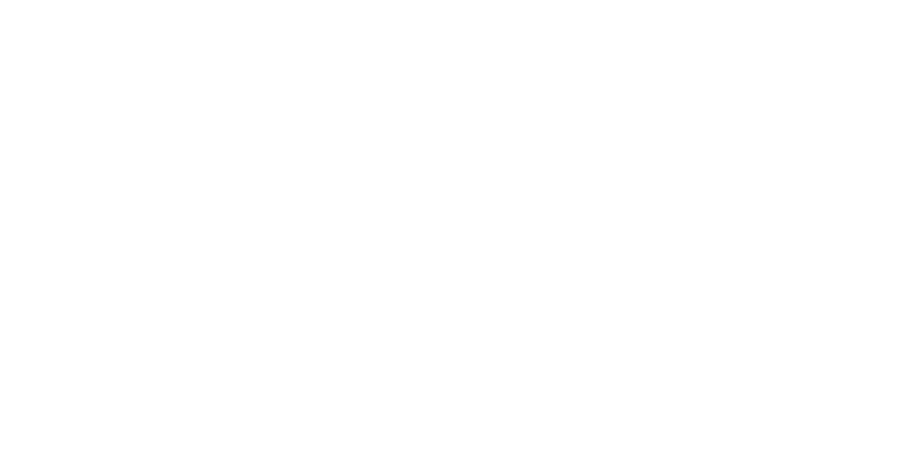

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4)) #changes figure size
plt.plot(datacost['LotArea'],datacost['SalePrice'],'b.', alpha=0.1)

<IPython.core.display.Javascript object>


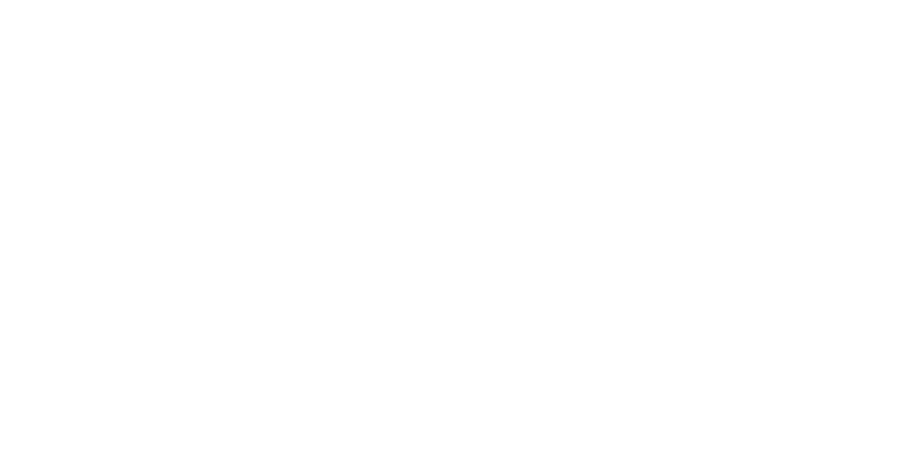

(130000, 280000)

In [8]:
plt.figure(figsize=(8,4)) #changes figure size
plt.plot(datacost['LotArea'],datacost['SalePrice'],'b.', alpha=0.1)
plt.xlim(0,20000) #limits the x axis
plt.ylim(130000,280000) #limits the y axis

**Simple Linear Regression (using one feature):**  
y = wx + b (where y is our label, w is the slope of our line or relationship between our feature and label, x is our label and b is our y-intercept).  

**Multiple Linear Regression (using more than one feature):**  
y = b + w1x1 + w2x2 + w3x3 + ... + wnxn  (where all variables are the same as above but we use more features and thus have multiple relationships between x & y (our w variable).

The concept behind linear regression is to reduce the error between the predicted value of y1 and the actual value of y.  To determine this error, we use the **loss function**:  
LOSS = 1/n * sum (y-y1)^2 + (y-y2)^2 + ... (y-yn)^2 where n is the total number of data points used.

In [9]:
import numpy as np #allows us to use numpy arrays so that mathematical functions can be computed

In [10]:
a=datacost['LotArea'].values #creates series of just Lot Area
b=datacost['SalePrice'].values #creates series of just Sale Price
x=np.array(a) #array of all x-values/features (Lot Area)
y=np.array(b) #array of all y-values/labels (Sale Price)
l=len(datacost) #definited l as the length of the dataframe

In [11]:
bee=np.ones(l) #makes an array of all ones for as many items as are in the dataframe small

In [12]:
bee

array([1., 1., 1., ..., 1., 1., 1.])

In [13]:
X=np.array([x,bee]).T #transpose of the array - creates array X as a combination of x and bee

In [14]:
X #[x-value, coefficient of b]

array([[1.1622e+04, 1.0000e+00],
       [1.4267e+04, 1.0000e+00],
       [1.3830e+04, 1.0000e+00],
       ...,
       [2.0000e+04, 1.0000e+00],
       [1.0441e+04, 1.0000e+00],
       [9.6270e+03, 1.0000e+00]])

### Python coding to develop regression
The partial derivative of the loss function is needed in order to determine the point where the least amount of error occurs.  Because we only used one variable, determining the derivative based on w and b is as follows:  
**y = wx + b  
LOSS = SUM (y1-y)^2
LOSS = SUM (y1 - wx + b)^2
  
  Partial derivative of LOSS with respect to w:
  SUM 2(y1-x + b)x  
  
  Parial deriviate of LOSS with respect to b:
  SUM 2(y1-y) 
  

In [22]:
slope_val = 0 #starting point for w - we can choose anything
intercept = 155000 # starting point for b - we can choose anything

w=np.array([slope_val,intercept])
def loss(w,X,y):
    return(np.sum((np.dot(X,w)-y)**2)/l) #.dot function [x1, 1; x2, 1; x3, 1] [w, b]=[(wx1+1b)+(wx2+1b)+(wx3+1b)]
#This returns SUM [(y1-y)^2]n
def LossDerivW(w,X,y):
    return(2*(np.sum(np.dot((np.dot(X,w)-y),X.T[0]))/l)) 
#This returns 2 SUM [[(wx1+1b)-y]x1+[(wx2+1b)-y]x2+[(wx3+1b)-y]x3]/n
def LossDerivB(w,X,y):
    return(2*(np.sum((np.dot(X,w)-y))/l))#2SUM
#This returns 2 SUM [(wx1+1b)-y+(wx2+1b)-y+(wx3+1b)-y]/n
loss_list = []

for ind in range (0,1000):    
 slope_val = slope_val - (LossDerivW(w,X,y)/10000000000) #This reduces our slope by a fraction of the partial derivate.
 #print("WD",slope_val); small increments ensures that we wont overshoot our estimate
 intercept = intercept - (LossDerivB(w,X,y)/10000000000) # We ran this loop 10 billion times, decreasing the interval each time.
 #print("BD",intercept)
 w=np.array([slope_val,intercept]) # we continue to store our revised slope value and intercepts and test them in our loss func.
 loss_list.append(loss(w,X,y)) #this creates a list of all loss values so that it can be represented visually.
 #print(loss(w,X,y))
#loss_list
print(w)

[2.44731721e+00 1.55000000e+05]


By programming this to run 10 billion times, we can see what the slope and intercept would be to produce the most minimal loss.  The equation of our line is: y = 2.45x + 155000.  First, we graph our regression to show our error reducing during each run through the for loop:

<IPython.core.display.Javascript object>


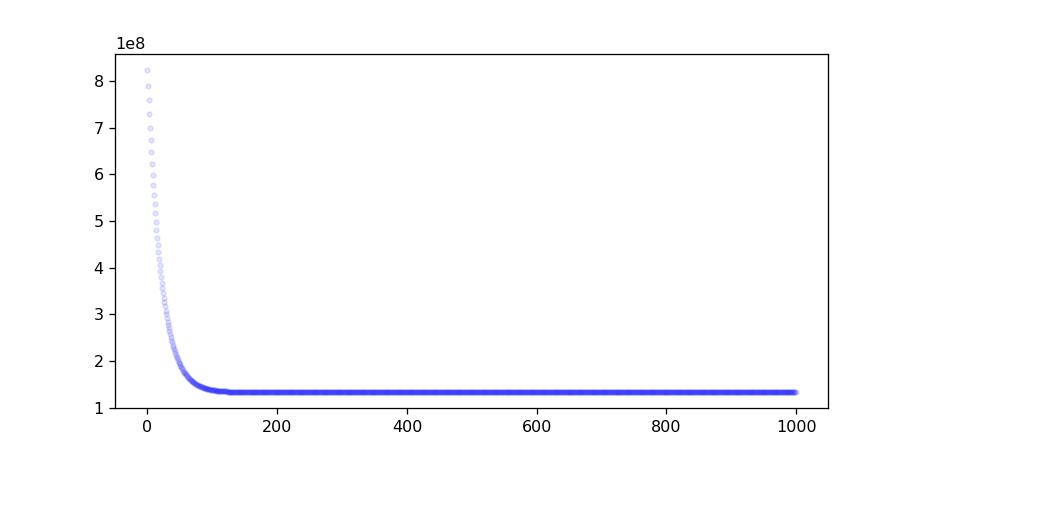

In [16]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4)) #changes figure size
plt.plot(loss_list,'b.', alpha=0.1)

Finally, we graph our line in comparison to our real data to show the relationship between Lot Area and Sale price.  The line in the graph below represents y = 2.45x + 155000.  This implies that for every 1 x-unit, the y-unit will increase at a rate of 2.45.

<IPython.core.display.Javascript object>


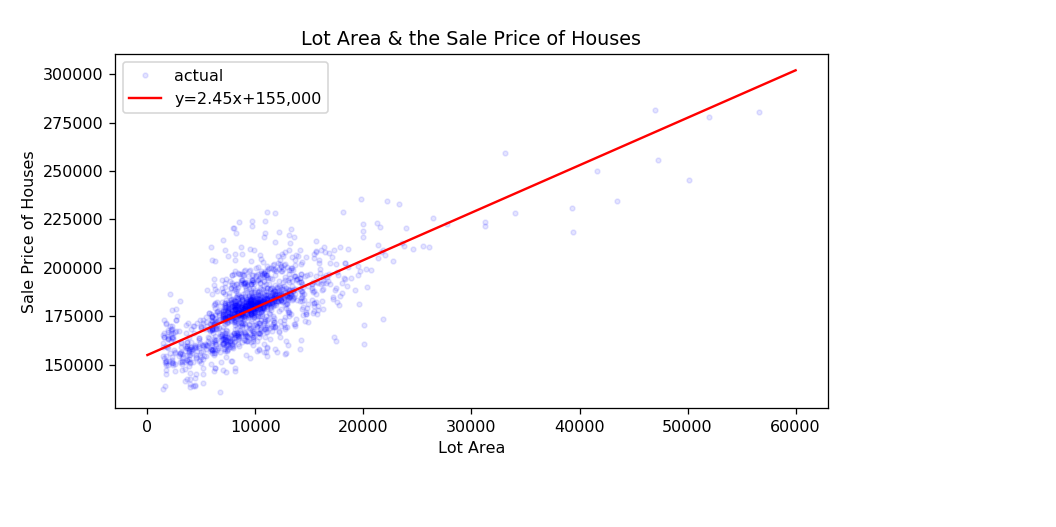

In [28]:
sl=2.45
interc=155000
plt.figure(figsize=(8,4)) #changes figure size
plt.plot(datacost['LotArea'],datacost['SalePrice'],'b.',label='actual', alpha=0.1)
plt.plot([0,60000],[interc,60000*sl+interc],label='y=2.45x+155,000',color='red')
plt.title('Lot Area & the Sale Price of Houses')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price of Houses')
plt.legend()
plt.show()